# 02 Regime sweep analysis

This notebook loads `results.csv` created by `mm-sim sweep` and visualises regime behaviour.

It assumes `results.csv` is in the repository root.


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
import os
import pandas as pd

repo_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
path = os.path.join(repo_root, "results.csv")

df = pd.read_csv(path)
df.head()

,sigma,lambda0,n_paths,path_mean,pnl_final_mean,pnl_mean_step_mean,pnl_std_step_mean,max_abs_inventory_mean,fills_total_mean,fills_bid_mean,...,path_std,pnl_final_std,pnl_mean_step_std,pnl_std_step_std,max_abs_inventory_std,fills_total_std,fills_bid_std,fills_ask_std,spread_mean_std,sharpe_step_std
0,0.01,0.5,100,49.5,146.878587,0.024480,0.127110,14.76,225.19,112.71,...,29.011492,9.837080,0.001640,0.004870,5.193469,14.872994,9.225891,8.960610,0.000060,0.007064
1,0.01,1.5,100,49.5,428.116553,0.071353,0.211980,21.69,657.58,328.08,...,29.011492,17.031787,0.002839,0.004767,6.945233,25.673624,13.841586,15.633750,0.000063,0.007838
2,0.01,3.0,100,49.5,834.507490,0.139085,0.286672,25.29,1282.03,640.26,...,29.011492,24.014878,0.004002,0.004464,7.413195,36.904040,18.554109,21.699441,0.000067,0.008779
3,0.02,0.5,100,49.5,146.236668,0.024373,0.128963,11.40,224.39,111.87,...,29.011492,9.772907,0.001629,0.005064,3.516196,14.807789,8.431129,8.532150,0.000052,0.007776
4,0.02,1.5,100,49.5,426.694285,0.071116,0.213393,15.49,655.13,326.82,...,29.011492,16.838227,0.002806,0.004918,4.685018,25.408841,12.507275,14.946163,0.000053,0.007961


Mean final PnL vs volatility

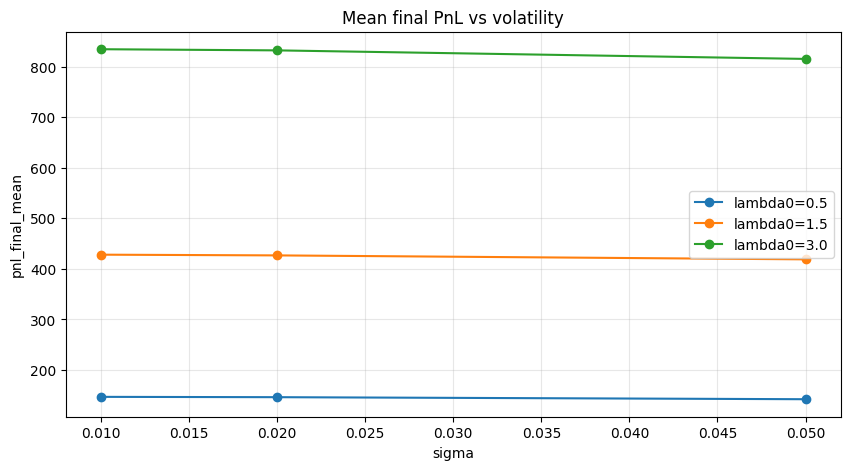

In [11]:
d = df.sort_values(["lambda0", "sigma"]).copy()

fig, ax = plt.subplots(figsize=(10, 5))
for lam, g in d.groupby("lambda0"):
    ax.plot(g["sigma"], g["pnl_final_mean"], marker="o", label=f"lambda0={lam}")
ax.set_title("Mean final PnL vs volatility")
ax.set_xlabel("sigma")
ax.set_ylabel("pnl_final_mean")
ax.grid(True, alpha=0.3)
ax.legend()
plt.show()


Final PnL standard deviation vs volatility

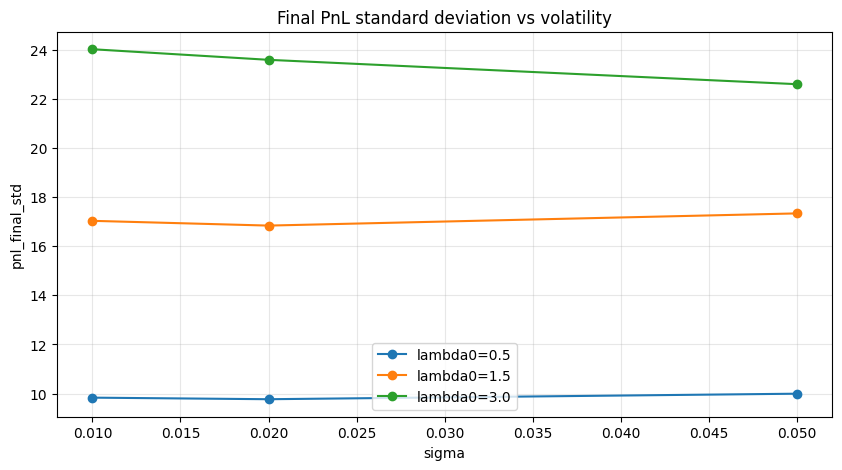

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))
for lam, g in d.groupby("lambda0"):
    ax.plot(g["sigma"], g["pnl_final_std"], marker="o", label=f"lambda0={lam}")
ax.set_title("Final PnL standard deviation vs volatility")
ax.set_xlabel("sigma")
ax.set_ylabel("pnl_final_std")
ax.grid(True, alpha=0.3)
ax.legend()
plt.show()


Average max absolute inventory vs volatility

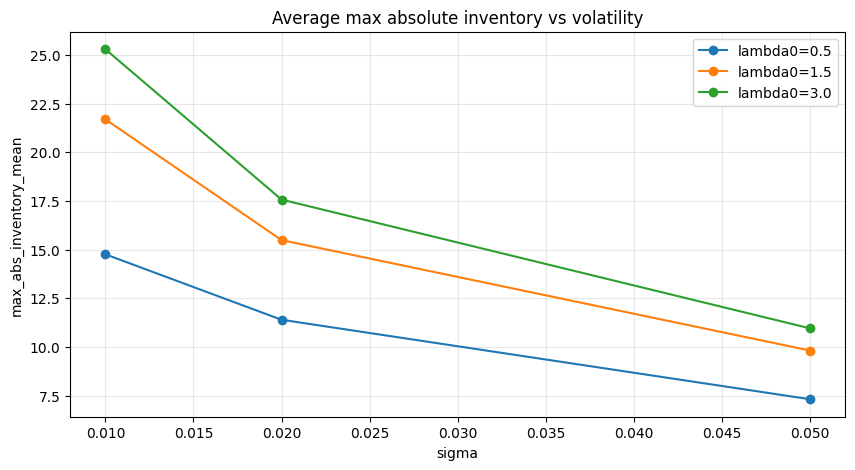

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
for lam, g in d.groupby("lambda0"):
    ax.plot(g["sigma"], g["max_abs_inventory_mean"], marker="o", label=f"lambda0={lam}")
ax.set_title("Average max absolute inventory vs volatility")
ax.set_xlabel("sigma")
ax.set_ylabel("max_abs_inventory_mean")
ax.grid(True, alpha=0.3)
ax.legend()
plt.show()


Heatmap of mean final PnL

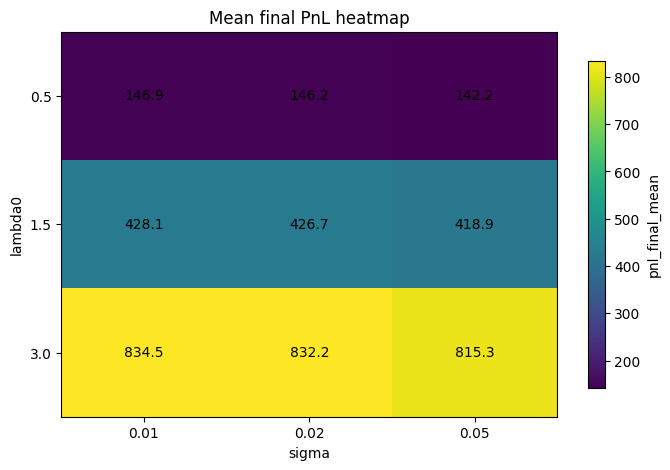

In [15]:
pivot = df.pivot(index="lambda0", columns="sigma", values="pnl_final_mean").sort_index(axis=0).sort_index(axis=1)

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(pivot.values, aspect="auto")

ax.set_xticks(range(pivot.shape[1]))
ax.set_xticklabels([str(x) for x in pivot.columns])
ax.set_yticks(range(pivot.shape[0]))
ax.set_yticklabels([str(y) for y in pivot.index])

ax.set_xlabel("sigma")
ax.set_ylabel("lambda0")
ax.set_title("Mean final PnL heatmap")

for i in range(pivot.shape[0]):
    for j in range(pivot.shape[1]):
        ax.text(j, i, f"{pivot.values[i, j]:.1f}", ha="center", va="center")

fig.colorbar(im, ax=ax, shrink=0.85, label="pnl_final_mean")
plt.show()


Tips

- If results look noisy, increase `--n-paths` in the sweep.
- You can also visualise `fills_total_mean` and `spread_mean_mean` to understand turnover.
